In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end_kernel

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('yacht')

In [3]:
y_mean = torch.mean(y_train)
y_sd = torch.std(y_train)

y_train = (y_train - y_mean) / y_sd

In [4]:
end2end_model = end2end_kernel.train_model_kernel(x_train, y_train, n_epoch = 2000, hidden_layers = [30, 30], learning_rate = 0.0012, exp_decay = .998)

initial loss:  4.230287075042725
cal loss:  0.7601512670516968 cal error: 0.1143289224952741 nllk loss:  tensor(1.1755, grad_fn=<MeanBackward0>) kernel loss: tensor(1.0183, grad_fn=<MeanBackward0>)
cal loss:  0.671323835849762 cal error: 0.12816635160680528 nllk loss:  tensor(1.1110, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9104, grad_fn=<MeanBackward0>)
cal loss:  0.9745352864265442 cal error: 0.1403780718336484 nllk loss:  tensor(1.0509, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6925, grad_fn=<MeanBackward0>)
cal loss:  0.8646644353866577 cal error: 0.1554253308128544 nllk loss:  tensor(1.0073, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6503, grad_fn=<MeanBackward0>)
cal loss:  0.9485899806022644 cal error: 0.1644423440453686 nllk loss:  tensor(0.9656, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4610, grad_fn=<MeanBackward0>)
cal loss:  0.6372083425521851 cal error: 0.17325141776937614 nllk loss:  tensor(0.9377, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3912, g

cal loss:  0.24882185459136963 cal error: 0.11219281663516067 nllk loss:  tensor(-0.4322, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1402, grad_fn=<MeanBackward0>)
cal loss:  0.7167463302612305 cal error: 0.09998109640831761 nllk loss:  tensor(-0.4675, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1528, grad_fn=<MeanBackward0>)
cal loss:  0.5564289093017578 cal error: 0.09323251417769379 nllk loss:  tensor(-0.5068, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1369, grad_fn=<MeanBackward0>)
cal loss:  0.5946521162986755 cal error: 0.08691871455576558 nllk loss:  tensor(-0.5371, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1223, grad_fn=<MeanBackward0>)
cal loss:  0.7457351684570312 cal error: 0.08413988657844991 nllk loss:  tensor(-0.5678, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1291, grad_fn=<MeanBackward0>)
cal loss:  0.5147315859794617 cal error: 0.08024574669187147 nllk loss:  tensor(-0.5972, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1270, grad_fn=<MeanBackward0

cal loss:  0.2518409192562103 cal error: 0.08448015122873348 nllk loss:  tensor(-1.8306, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1236, grad_fn=<MeanBackward0>)
cal loss:  0.16530965268611908 cal error: 0.24858223062381846 nllk loss:  tensor(-1.8340, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0959, grad_fn=<MeanBackward0>)
cal loss:  0.24659864604473114 cal error: 0.08453686200378074 nllk loss:  tensor(-1.8901, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1324, grad_fn=<MeanBackward0>)
cal loss:  0.13756494224071503 cal error: 0.2618336483931946 nllk loss:  tensor(-1.8847, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1184, grad_fn=<MeanBackward0>)
cal loss:  0.437175452709198 cal error: 0.09873345935727793 nllk loss:  tensor(-1.9275, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1188, grad_fn=<MeanBackward0>)
cal loss:  0.03146966174244881 cal error: 0.2950472589792061 nllk loss:  tensor(-1.9079, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1235, grad_fn=<MeanBackward0

cal loss:  0.16386502981185913 cal error: 0.3510775047258979 nllk loss:  tensor(-2.7832, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1338, grad_fn=<MeanBackward0>)
cal loss:  0.10938497632741928 cal error: 0.20652173913043484 nllk loss:  tensor(-2.9221, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1120, grad_fn=<MeanBackward0>)
cal loss:  0.15340092778205872 cal error: 0.274366729678639 nllk loss:  tensor(-2.9352, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1370, grad_fn=<MeanBackward0>)
cal loss:  0.14628536999225616 cal error: 0.18737240075614367 nllk loss:  tensor(-3.0044, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1288, grad_fn=<MeanBackward0>)
cal loss:  0.04218071699142456 cal error: 0.2842911153119092 nllk loss:  tensor(-2.9748, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1242, grad_fn=<MeanBackward0>)
cal loss:  0.1668476164340973 cal error: 0.22349716446124765 nllk loss:  tensor(-2.9852, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1099, grad_fn=<MeanBackward0

cal loss:  0.08258827030658722 cal error: 0.254952741020794 nllk loss:  tensor(-3.5421, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1138, grad_fn=<MeanBackward0>)
cal loss:  0.10845823585987091 cal error: 0.11258979206049147 nllk loss:  tensor(-3.6914, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1152, grad_fn=<MeanBackward0>)
cal loss:  0.07414426654577255 cal error: 0.10901701323251418 nllk loss:  tensor(-3.7209, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1158, grad_fn=<MeanBackward0>)
cal loss:  0.1762596070766449 cal error: 0.09724007561436672 nllk loss:  tensor(-3.7457, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1092, grad_fn=<MeanBackward0>)
cal loss:  0.08940587937831879 cal error: 0.09431001890359166 nllk loss:  tensor(-3.7700, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1167, grad_fn=<MeanBackward0>)
cal loss:  0.09355956315994263 cal error: 0.0900945179584121 nllk loss:  tensor(-3.7937, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1431, grad_fn=<MeanBackward

cal loss:  0.043231185525655746 cal error: 0.0810396975425331 nllk loss:  tensor(-4.3527, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1120, grad_fn=<MeanBackward0>)
cal loss:  0.10461875051259995 cal error: 0.08052930056710773 nllk loss:  tensor(-4.3693, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1219, grad_fn=<MeanBackward0>)
cal loss:  0.0667869821190834 cal error: 0.07551984877126657 nllk loss:  tensor(-4.3861, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1259, grad_fn=<MeanBackward0>)
cal loss:  0.056553423404693604 cal error: 0.07672967863894141 nllk loss:  tensor(-4.4028, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0871, grad_fn=<MeanBackward0>)
cal loss:  0.06202669441699982 cal error: 0.07519848771266542 nllk loss:  tensor(-4.4198, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1094, grad_fn=<MeanBackward0>)
cal loss:  0.07501165568828583 cal error: 0.07529300567107751 nllk loss:  tensor(-4.4367, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1113, grad_fn=<MeanBack

cal loss:  0.03476385772228241 cal error: 0.08300567107750473 nllk loss:  tensor(-4.6734, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1169, grad_fn=<MeanBackward0>)
cal loss:  0.03682578355073929 cal error: 0.1125141776937618 nllk loss:  tensor(-4.6568, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1037, grad_fn=<MeanBackward0>)
cal loss:  0.07154698669910431 cal error: 0.1694896030245747 nllk loss:  tensor(-4.5768, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1149, grad_fn=<MeanBackward0>)
cal loss:  0.04252948611974716 cal error: 0.3895085066162571 nllk loss:  tensor(-4.2680, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1043, grad_fn=<MeanBackward0>)
cal loss:  0.06349732726812363 cal error: 0.7627788279773158 nllk loss:  tensor(-3.3727, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1274, grad_fn=<MeanBackward0>)
cal loss:  0.06923912465572357 cal error: 1.2497542533081283 nllk loss:  tensor(-0.9367, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1009, grad_fn=<MeanBackward0

cal loss:  0.07431928813457489 cal error: 0.11502835538752362 nllk loss:  tensor(-4.7528, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1399, grad_fn=<MeanBackward0>)
cal loss:  0.036483701318502426 cal error: 0.11446124763705104 nllk loss:  tensor(-4.7658, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1133, grad_fn=<MeanBackward0>)
cal loss:  0.06640348583459854 cal error: 0.11185255198487715 nllk loss:  tensor(-4.7768, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1079, grad_fn=<MeanBackward0>)
cal loss:  0.03681909665465355 cal error: 0.10975425330812855 nllk loss:  tensor(-4.7871, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1107, grad_fn=<MeanBackward0>)
cal loss:  0.049915630370378494 cal error: 0.10850661625708885 nllk loss:  tensor(-4.7971, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1116, grad_fn=<MeanBackward0>)
cal loss:  0.06740004569292068 cal error: 0.10705103969754254 nllk loss:  tensor(-4.8071, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0914, grad_fn=<MeanBa

cal loss:  0.046976249665021896 cal error: 0.08776937618147447 nllk loss:  tensor(-5.0207, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1058, grad_fn=<MeanBackward0>)
cal loss:  0.037087853997945786 cal error: 0.08784499054820415 nllk loss:  tensor(-5.0294, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0974, grad_fn=<MeanBackward0>)
cal loss:  0.04793814942240715 cal error: 0.08444234404536861 nllk loss:  tensor(-5.0379, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1239, grad_fn=<MeanBackward0>)
cal loss:  0.04537305235862732 cal error: 0.08512287334593573 nllk loss:  tensor(-5.0467, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1237, grad_fn=<MeanBackward0>)
cal loss:  0.059922054409980774 cal error: 0.08362948960302455 nllk loss:  tensor(-5.0552, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1138, grad_fn=<MeanBackward0>)
cal loss:  0.03152491897344589 cal error: 0.08296786389413989 nllk loss:  tensor(-5.0639, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1046, grad_fn=<MeanB

cal loss:  0.03422251716256142 cal error: 0.0744234404536862 nllk loss:  tensor(-5.2100, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0948, grad_fn=<MeanBackward0>)
cal loss:  0.036864519119262695 cal error: 0.072703213610586 nllk loss:  tensor(-5.2173, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1005, grad_fn=<MeanBackward0>)
cal loss:  0.03962850570678711 cal error: 0.07102079395085066 nllk loss:  tensor(-5.2245, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1176, grad_fn=<MeanBackward0>)
cal loss:  0.0609760656952858 cal error: 0.07243856332703213 nllk loss:  tensor(-5.2318, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1113, grad_fn=<MeanBackward0>)
cal loss:  0.03152292221784592 cal error: 0.06964083175803404 nllk loss:  tensor(-5.2391, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1145, grad_fn=<MeanBackward0>)
cal loss:  0.05706598982214928 cal error: 0.06996219281663515 nllk loss:  tensor(-5.2462, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1092, grad_fn=<MeanBackwar

cal loss:  0.0407218299806118 cal error: 0.0708506616257089 nllk loss:  tensor(-5.3500, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1265, grad_fn=<MeanBackward0>)
cal loss:  0.037651658058166504 cal error: 0.06937618147448017 nllk loss:  tensor(-5.3559, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1267, grad_fn=<MeanBackward0>)
cal loss:  0.039916981011629105 cal error: 0.07005671077504728 nllk loss:  tensor(-5.3619, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1031, grad_fn=<MeanBackward0>)
cal loss:  0.03284314274787903 cal error: 0.06795841209829868 nllk loss:  tensor(-5.3676, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1057, grad_fn=<MeanBackward0>)
cal loss:  0.03537348657846451 cal error: 0.06531190926275994 nllk loss:  tensor(-5.3735, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1085, grad_fn=<MeanBackward0>)
cal loss:  0.033064309507608414 cal error: 0.06531190926275994 nllk loss:  tensor(-5.3794, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0929, grad_fn=<MeanBac

cal loss:  0.034260064363479614 cal error: 0.06502835538752365 nllk loss:  tensor(-5.4688, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1090, grad_fn=<MeanBackward0>)
cal loss:  0.03528041020035744 cal error: 0.061739130434782595 nllk loss:  tensor(-5.4738, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1027, grad_fn=<MeanBackward0>)
cal loss:  0.030083883553743362 cal error: 0.061474480151228715 nllk loss:  tensor(-5.4788, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1123, grad_fn=<MeanBackward0>)
cal loss:  0.03311150148510933 cal error: 0.06166351606805292 nllk loss:  tensor(-5.4836, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0926, grad_fn=<MeanBackward0>)
cal loss:  0.034403201192617416 cal error: 0.0634593572778828 nllk loss:  tensor(-5.4885, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0927, grad_fn=<MeanBackward0>)
cal loss:  0.04697654768824577 cal error: 0.06156899810964082 nllk loss:  tensor(-5.4935, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0948, grad_fn=<Mean

cal loss:  0.02616148814558983 cal error: 0.056767485822306236 nllk loss:  tensor(-5.5896, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1145, grad_fn=<MeanBackward0>)
cal loss:  0.024431798607110977 cal error: 0.05661625708884689 nllk loss:  tensor(-5.5942, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1138, grad_fn=<MeanBackward0>)
cal loss:  0.04937787726521492 cal error: 0.05499054820415878 nllk loss:  tensor(-5.5988, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1240, grad_fn=<MeanBackward0>)
cal loss:  0.024125799536705017 cal error: 0.055916824196597374 nllk loss:  tensor(-5.6033, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1013, grad_fn=<MeanBackward0>)
cal loss:  0.05850209295749664 cal error: 0.053705103969754246 nllk loss:  tensor(-5.6077, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1140, grad_fn=<MeanBackward0>)
cal loss:  0.026901748031377792 cal error: 0.05504725897920604 nllk loss:  tensor(-5.6127, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0920, grad_fn=<Me

cal loss:  0.032610103487968445 cal error: 0.05627599243856331 nllk loss:  tensor(-5.7133, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0859, grad_fn=<MeanBackward0>)
cal loss:  0.032737910747528076 cal error: 0.05313799621928164 nllk loss:  tensor(-5.7176, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0952, grad_fn=<MeanBackward0>)
cal loss:  0.030831273645162582 cal error: 0.05570888468809073 nllk loss:  tensor(-5.7220, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1026, grad_fn=<MeanBackward0>)
cal loss:  0.029514649882912636 cal error: 0.05143667296786387 nllk loss:  tensor(-5.7263, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0976, grad_fn=<MeanBackward0>)
cal loss:  0.04485089331865311 cal error: 0.053100189035916824 nllk loss:  tensor(-5.7306, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0878, grad_fn=<MeanBackward0>)
cal loss:  0.04003002122044563 cal error: 0.051682419659735336 nllk loss:  tensor(-5.7348, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0953, grad_fn=<Me

cal loss:  0.03309386223554611 cal error: 0.04801512287334594 nllk loss:  tensor(-5.8199, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1110, grad_fn=<MeanBackward0>)
cal loss:  0.026222169399261475 cal error: 0.04816635160680529 nllk loss:  tensor(-5.8237, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0966, grad_fn=<MeanBackward0>)
cal loss:  0.044491689652204514 cal error: 0.04810964083175804 nllk loss:  tensor(-5.8275, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1147, grad_fn=<MeanBackward0>)
cal loss:  0.03624266758561134 cal error: 0.05143667296786391 nllk loss:  tensor(-5.8312, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0968, grad_fn=<MeanBackward0>)
cal loss:  0.04852468892931938 cal error: 0.04638941398865785 nllk loss:  tensor(-5.8351, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0972, grad_fn=<MeanBackward0>)
cal loss:  0.028159884735941887 cal error: 0.0473156899810964 nllk loss:  tensor(-5.8390, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0942, grad_fn=<MeanBa

cal loss:  0.019792258739471436 cal error: 0.05378071833648395 nllk loss:  tensor(-5.9148, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1143, grad_fn=<MeanBackward0>)
cal loss:  0.027433980256319046 cal error: 0.04941398865784498 nllk loss:  tensor(-5.9184, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0908, grad_fn=<MeanBackward0>)
cal loss:  0.01623987779021263 cal error: 0.051871455576559526 nllk loss:  tensor(-5.9219, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0907, grad_fn=<MeanBackward0>)
cal loss:  0.01791776902973652 cal error: 0.05155009451795841 nllk loss:  tensor(-5.9252, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0954, grad_fn=<MeanBackward0>)
cal loss:  0.01991773024201393 cal error: 0.04954631379962192 nllk loss:  tensor(-5.9286, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1167, grad_fn=<MeanBackward0>)
cal loss:  0.03323426470160484 cal error: 0.04850661625708884 nllk loss:  tensor(-5.9319, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1169, grad_fn=<MeanB

cal loss:  0.021265726536512375 cal error: 0.04612476370510397 nllk loss:  tensor(-5.9912, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1146, grad_fn=<MeanBackward0>)
cal loss:  0.024050427600741386 cal error: 0.04727788279773155 nllk loss:  tensor(-5.9986, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1171, grad_fn=<MeanBackward0>)
cal loss:  0.022914912551641464 cal error: 0.040661625708884694 nllk loss:  tensor(-6.0036, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1048, grad_fn=<MeanBackward0>)
cal loss:  0.029780365526676178 cal error: 0.04372400756143667 nllk loss:  tensor(-6.0077, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0933, grad_fn=<MeanBackward0>)
cal loss:  0.018727663904428482 cal error: 0.04047258979206049 nllk loss:  tensor(-6.0112, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0967, grad_fn=<MeanBackward0>)
cal loss:  0.023857561871409416 cal error: 0.04436672967863892 nllk loss:  tensor(-6.0144, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0960, grad_fn=<M

cal loss:  0.017735477536916733 cal error: 0.2983931947069942 nllk loss:  tensor(-5.7029, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1120, grad_fn=<MeanBackward0>)
cal loss:  0.018786555156111717 cal error: 0.14035916824196598 nllk loss:  tensor(-5.9166, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0980, grad_fn=<MeanBackward0>)
cal loss:  0.02194490283727646 cal error: 0.10742911153119093 nllk loss:  tensor(-6.0023, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0921, grad_fn=<MeanBackward0>)
cal loss:  0.041300348937511444 cal error: 0.06209829867674858 nllk loss:  tensor(-6.0478, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1088, grad_fn=<MeanBackward0>)
cal loss:  0.01698155701160431 cal error: 0.05168241965973536 nllk loss:  tensor(-6.0692, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1090, grad_fn=<MeanBackward0>)
cal loss:  0.027730436995625496 cal error: 0.03911153119092628 nllk loss:  tensor(-6.0812, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1030, grad_fn=<MeanB

cal loss:  0.011409196071326733 cal error: 0.6573913043478262 nllk loss:  tensor(-4.6683, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0947, grad_fn=<MeanBackward0>)
cal loss:  0.007411184720695019 cal error: 0.689111531190926 nllk loss:  tensor(-4.5359, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1029, grad_fn=<MeanBackward0>)
cal loss:  0.015357336960732937 cal error: 0.5640264650283555 nllk loss:  tensor(-5.0555, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1035, grad_fn=<MeanBackward0>)
cal loss:  0.02008740045130253 cal error: 0.4451039697542532 nllk loss:  tensor(-5.4075, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1065, grad_fn=<MeanBackward0>)
cal loss:  0.009675059467554092 cal error: 0.2506238185255199 nllk loss:  tensor(-5.7861, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0995, grad_fn=<MeanBackward0>)
cal loss:  0.013587309047579765 cal error: 0.1864272211720226 nllk loss:  tensor(-5.9568, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0904, grad_fn=<MeanBackwa

cal loss:  0.01197434589266777 cal error: 0.3689792060491493 nllk loss:  tensor(-5.6959, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0938, grad_fn=<MeanBackward0>)
cal loss:  0.014600479044020176 cal error: 0.4296219281663517 nllk loss:  tensor(-5.4328, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1022, grad_fn=<MeanBackward0>)
cal loss:  0.014611237682402134 cal error: 0.5817391304347825 nllk loss:  tensor(-5.0980, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1025, grad_fn=<MeanBackward0>)
cal loss:  0.011235445737838745 cal error: 0.5727221172022685 nllk loss:  tensor(-5.0653, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1068, grad_fn=<MeanBackward0>)
cal loss:  0.012844378128647804 cal error: 0.5744234404536862 nllk loss:  tensor(-5.1006, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1088, grad_fn=<MeanBackward0>)
cal loss:  0.009555874392390251 cal error: 0.4163894139886579 nllk loss:  tensor(-5.4726, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0976, grad_fn=<MeanBackw

cal loss:  0.008736014366149902 cal error: 0.2747637051039698 nllk loss:  tensor(-5.8299, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1031, grad_fn=<MeanBackward0>)
cal loss:  0.015961099416017532 cal error: 0.4141398865784499 nllk loss:  tensor(-5.6076, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1023, grad_fn=<MeanBackward0>)
cal loss:  0.009730685502290726 cal error: 0.43712665406427226 nllk loss:  tensor(-5.4784, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1144, grad_fn=<MeanBackward0>)
cal loss:  0.006520178634673357 cal error: 0.5029111531190925 nllk loss:  tensor(-5.3662, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1038, grad_fn=<MeanBackward0>)
cal loss:  0.013074029237031937 cal error: 0.4288846880907373 nllk loss:  tensor(-5.5127, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0916, grad_fn=<MeanBackward0>)
cal loss:  0.013547040522098541 cal error: 0.3917391304347825 nllk loss:  tensor(-5.6481, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1148, grad_fn=<MeanBac

cal loss:  0.006715264171361923 cal error: 0.4109073724007561 nllk loss:  tensor(-5.6792, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1187, grad_fn=<MeanBackward0>)
cal loss:  0.012989438138902187 cal error: 0.3674480151228734 nllk loss:  tensor(-5.7378, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0955, grad_fn=<MeanBackward0>)
cal loss:  0.01860368251800537 cal error: 0.362211720226843 nllk loss:  tensor(-5.8002, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0851, grad_fn=<MeanBackward0>)
cal loss:  0.011831886135041714 cal error: 0.25844990548204166 nllk loss:  tensor(-5.9574, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0920, grad_fn=<MeanBackward0>)
cal loss:  0.017220189794898033 cal error: 0.24204158790170133 nllk loss:  tensor(-6.0631, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1023, grad_fn=<MeanBackward0>)
cal loss:  0.011445275507867336 cal error: 0.14406427221172027 nllk loss:  tensor(-6.1732, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1003, grad_fn=<MeanBac

cal loss:  0.009291419759392738 cal error: 0.1417769376181475 nllk loss:  tensor(-6.2198, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1143, grad_fn=<MeanBackward0>)
cal loss:  0.02107023261487484 cal error: 0.13793950850661618 nllk loss:  tensor(-6.2756, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1061, grad_fn=<MeanBackward0>)
cal loss:  0.00822511874139309 cal error: 0.07945179584120986 nllk loss:  tensor(-6.3265, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0890, grad_fn=<MeanBackward0>)
cal loss:  0.01754128187894821 cal error: 0.08844990548204154 nllk loss:  tensor(-6.3581, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1124, grad_fn=<MeanBackward0>)
cal loss:  0.01159797515720129 cal error: 0.04790170132325143 nllk loss:  tensor(-6.3833, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0968, grad_fn=<MeanBackward0>)
cal loss:  0.007996531203389168 cal error: 0.058185255198487704 nllk loss:  tensor(-6.3999, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1217, grad_fn=<MeanBa

cal loss:  0.011025854386389256 cal error: 0.05648393194706992 nllk loss:  tensor(-6.4529, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1136, grad_fn=<MeanBackward0>)
cal loss:  0.022252552211284637 cal error: 0.028090737240075617 nllk loss:  tensor(-6.4635, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1073, grad_fn=<MeanBackward0>)
cal loss:  0.023499388247728348 cal error: 0.04194706994328921 nllk loss:  tensor(-6.4712, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0976, grad_fn=<MeanBackward0>)
cal loss:  0.013606434687972069 cal error: 0.023875236294896043 nllk loss:  tensor(-6.4775, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1158, grad_fn=<MeanBackward0>)
cal loss:  0.022507695481181145 cal error: 0.03646502835538751 nllk loss:  tensor(-6.4824, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1019, grad_fn=<MeanBackward0>)
cal loss:  0.015622335486114025 cal error: 0.020434782608695662 nllk loss:  tensor(-6.4864, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0896, grad_fn=

cal loss:  0.021420279517769814 cal error: 0.019300567107750487 nllk loss:  tensor(-6.5322, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1058, grad_fn=<MeanBackward0>)
cal loss:  0.019747737795114517 cal error: 0.03058601134215501 nllk loss:  tensor(-6.5347, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0976, grad_fn=<MeanBackward0>)
cal loss:  0.012534829787909985 cal error: 0.018525519848771276 nllk loss:  tensor(-6.5366, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0995, grad_fn=<MeanBackward0>)
cal loss:  0.015653390437364578 cal error: 0.029848771266540647 nllk loss:  tensor(-6.5380, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1023, grad_fn=<MeanBackward0>)
cal loss:  0.011159929446876049 cal error: 0.01956521739130436 nllk loss:  tensor(-6.5393, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1141, grad_fn=<MeanBackward0>)
cal loss:  0.01001091580837965 cal error: 0.02945179584120983 nllk loss:  tensor(-6.5403, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1038, grad_fn=<

cal loss:  0.016364356502890587 cal error: 0.03708884688090734 nllk loss:  tensor(-6.5741, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0969, grad_fn=<MeanBackward0>)
cal loss:  0.010383023880422115 cal error: 0.019867674858223074 nllk loss:  tensor(-6.5736, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1141, grad_fn=<MeanBackward0>)
cal loss:  0.011135200038552284 cal error: 0.038960302457466886 nllk loss:  tensor(-6.5719, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1087, grad_fn=<MeanBackward0>)
cal loss:  0.01689067669212818 cal error: 0.024423440453686204 nllk loss:  tensor(-6.5696, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0882, grad_fn=<MeanBackward0>)
cal loss:  0.022916242480278015 cal error: 0.044612476370510384 nllk loss:  tensor(-6.5658, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1200, grad_fn=<MeanBackward0>)
cal loss:  0.009853819385170937 cal error: 0.026502835538752375 nllk loss:  tensor(-6.5614, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0972, grad_fn

cal loss:  0.00879130233079195 cal error: 0.03572778827977318 nllk loss:  tensor(-6.5788, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1063, grad_fn=<MeanBackward0>)
cal loss:  0.013183055445551872 cal error: 0.07017013232514177 nllk loss:  tensor(-6.5695, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0890, grad_fn=<MeanBackward0>)
cal loss:  0.005071117542684078 cal error: 0.04310018903591684 nllk loss:  tensor(-6.5616, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0950, grad_fn=<MeanBackward0>)
cal loss:  0.011190427467226982 cal error: 0.07945179584120982 nllk loss:  tensor(-6.5516, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1108, grad_fn=<MeanBackward0>)
cal loss:  0.005968536715954542 cal error: 0.058166351606805326 nllk loss:  tensor(-6.5424, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1095, grad_fn=<MeanBackward0>)
cal loss:  0.007168116047978401 cal error: 0.09741020793950847 nllk loss:  tensor(-6.5308, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0976, grad_fn=<Me

cal loss:  0.008851985447108746 cal error: 0.08729678638941395 nllk loss:  tensor(-6.5736, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0929, grad_fn=<MeanBackward0>)
cal loss:  0.008441144600510597 cal error: 0.056899810964083204 nllk loss:  tensor(-6.5740, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0777, grad_fn=<MeanBackward0>)
cal loss:  0.017171991989016533 cal error: 0.08964083175803397 nllk loss:  tensor(-6.5726, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1102, grad_fn=<MeanBackward0>)
cal loss:  0.010526769794523716 cal error: 0.05771266540642724 nllk loss:  tensor(-6.5759, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0926, grad_fn=<MeanBackward0>)
cal loss:  0.015344182960689068 cal error: 0.08652173913043473 nllk loss:  tensor(-6.5775, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0982, grad_fn=<MeanBackward0>)
cal loss:  0.009539471939206123 cal error: 0.05317580340264652 nllk loss:  tensor(-6.5853, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0937, grad_fn=<M

cal loss:  0.0071851289831101894 cal error: 0.03714555765595464 nllk loss:  tensor(-6.6417, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0994, grad_fn=<MeanBackward0>)
cal loss:  0.016027599573135376 cal error: 0.06814744801512287 nllk loss:  tensor(-6.6459, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0972, grad_fn=<MeanBackward0>)
cal loss:  0.0069959573447704315 cal error: 0.033610586011342175 nllk loss:  tensor(-6.6525, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1048, grad_fn=<MeanBackward0>)
cal loss:  0.00647529773414135 cal error: 0.05981096408317579 nllk loss:  tensor(-6.6573, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1186, grad_fn=<MeanBackward0>)
cal loss:  0.0075386324897408485 cal error: 0.029281663516068066 nllk loss:  tensor(-6.6632, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1024, grad_fn=<MeanBackward0>)
cal loss:  0.01564304158091545 cal error: 0.053875236294896024 nllk loss:  tensor(-6.6667, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0997, grad_fn

cal loss:  0.01632307656109333 cal error: 0.04841209829867672 nllk loss:  tensor(-6.7028, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1136, grad_fn=<MeanBackward0>)
cal loss:  0.006055134814232588 cal error: 0.024688090737240088 nllk loss:  tensor(-6.7063, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0897, grad_fn=<MeanBackward0>)
cal loss:  0.010447795502841473 cal error: 0.04546313799621926 nllk loss:  tensor(-6.7089, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1035, grad_fn=<MeanBackward0>)
cal loss:  0.007711577229201794 cal error: 0.02094517958412099 nllk loss:  tensor(-6.7119, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0949, grad_fn=<MeanBackward0>)
cal loss:  0.012820245698094368 cal error: 0.04362948960302456 nllk loss:  tensor(-6.7135, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1086, grad_fn=<MeanBackward0>)
cal loss:  0.010771391913294792 cal error: 0.01982986767485823 nllk loss:  tensor(-6.7157, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0917, grad_fn=<Me

cal loss:  0.008352461270987988 cal error: 0.016559546313799633 nllk loss:  tensor(-6.7436, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1184, grad_fn=<MeanBackward0>)
cal loss:  0.009485595859587193 cal error: 0.037618147448015116 nllk loss:  tensor(-6.7448, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0870, grad_fn=<MeanBackward0>)
cal loss:  0.010136011056602001 cal error: 0.01534971644612477 nllk loss:  tensor(-6.7464, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1065, grad_fn=<MeanBackward0>)
cal loss:  0.015732623636722565 cal error: 0.03701323251417768 nllk loss:  tensor(-6.7475, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1125, grad_fn=<MeanBackward0>)
cal loss:  0.009106358513236046 cal error: 0.014631379962192827 nllk loss:  tensor(-6.7486, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0956, grad_fn=<MeanBackward0>)
cal loss:  0.01627878099679947 cal error: 0.034782608695652174 nllk loss:  tensor(-6.7491, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0909, grad_fn=

cal loss:  0.010674817487597466 cal error: 0.033894139886578425 nllk loss:  tensor(-6.7741, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1000, grad_fn=<MeanBackward0>)
cal loss:  0.003907777369022369 cal error: 0.013724007561436682 nllk loss:  tensor(-6.7747, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1039, grad_fn=<MeanBackward0>)
cal loss:  0.017486747354269028 cal error: 0.033894139886578425 nllk loss:  tensor(-6.7751, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0932, grad_fn=<MeanBackward0>)
cal loss:  0.012836702167987823 cal error: 0.013724007561436682 nllk loss:  tensor(-6.7757, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1149, grad_fn=<MeanBackward0>)
cal loss:  0.01795683614909649 cal error: 0.033894139886578425 nllk loss:  tensor(-6.7760, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1017, grad_fn=<MeanBackward0>)
cal loss:  0.010604395531117916 cal error: 0.013724007561436682 nllk loss:  tensor(-6.7764, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1043, grad_f

cal loss:  0.010491568595170975 cal error: 0.009470699432892252 nllk loss:  tensor(-6.8010, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1008, grad_fn=<MeanBackward0>)
cal loss:  0.016771387308835983 cal error: 0.03330812854442343 nllk loss:  tensor(-6.8011, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0967, grad_fn=<MeanBackward0>)
cal loss:  0.0100548742339015 cal error: 0.009073724007561443 nllk loss:  tensor(-6.8015, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0924, grad_fn=<MeanBackward0>)
cal loss:  0.007979301735758781 cal error: 0.03347826086956521 nllk loss:  tensor(-6.8015, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1024, grad_fn=<MeanBackward0>)
cal loss:  0.004696335643529892 cal error: 0.009224952741020798 nllk loss:  tensor(-6.8017, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1026, grad_fn=<MeanBackward0>)
cal loss:  0.024774249643087387 cal error: 0.03446124763705103 nllk loss:  tensor(-6.8017, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0964, grad_fn=<M

cal loss:  0.012191387824714184 cal error: 0.03032136105860111 nllk loss:  tensor(-6.8252, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1139, grad_fn=<MeanBackward0>)
cal loss:  0.00971363577991724 cal error: 0.008260869565217394 nllk loss:  tensor(-6.8253, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1101, grad_fn=<MeanBackward0>)
cal loss:  0.007164954673498869 cal error: 0.029565217391304334 nllk loss:  tensor(-6.8252, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0963, grad_fn=<MeanBackward0>)
cal loss:  0.01531062088906765 cal error: 0.00875236294896031 nllk loss:  tensor(-6.8253, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0862, grad_fn=<MeanBackward0>)
cal loss:  0.015467767603695393 cal error: 0.031039697542533058 nllk loss:  tensor(-6.8255, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1086, grad_fn=<MeanBackward0>)
cal loss:  0.009880002588033676 cal error: 0.00875236294896031 nllk loss:  tensor(-6.8257, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1197, grad_fn=<M

cal loss:  0.0034326105378568172 cal error: 0.006181474480151232 nllk loss:  tensor(-6.8479, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1043, grad_fn=<MeanBackward0>)
cal loss:  0.013967140577733517 cal error: 0.024669187145557624 nllk loss:  tensor(-6.8482, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0988, grad_fn=<MeanBackward0>)
cal loss:  0.007221926935017109 cal error: 0.00646502835538753 nllk loss:  tensor(-6.8483, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1052, grad_fn=<MeanBackward0>)
cal loss:  0.0103756133466959 cal error: 0.02527410207939505 nllk loss:  tensor(-6.8485, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0826, grad_fn=<MeanBackward0>)
cal loss:  0.00810856744647026 cal error: 0.006786389413988661 nllk loss:  tensor(-6.8490, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0903, grad_fn=<MeanBackward0>)
cal loss:  0.00872031319886446 cal error: 0.02601134215500943 nllk loss:  tensor(-6.8488, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0919, grad_fn=<Me

cal loss:  0.015275868587195873 cal error: 0.02321361058601131 nllk loss:  tensor(-6.8694, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0922, grad_fn=<MeanBackward0>)
cal loss:  0.013717634603381157 cal error: 0.005897920604914941 nllk loss:  tensor(-6.8697, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1050, grad_fn=<MeanBackward0>)
cal loss:  0.008711399510502815 cal error: 0.023950850661625694 nllk loss:  tensor(-6.8699, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1012, grad_fn=<MeanBackward0>)
cal loss:  0.009487791918218136 cal error: 0.005897920604914941 nllk loss:  tensor(-6.8704, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1018, grad_fn=<MeanBackward0>)
cal loss:  0.00579072255641222 cal error: 0.023950850661625694 nllk loss:  tensor(-6.8703, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0922, grad_fn=<MeanBackward0>)
cal loss:  0.010079449974000454 cal error: 0.006143667296786395 nllk loss:  tensor(-6.8705, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0970, grad_fn

cal loss:  0.004847516771405935 cal error: 0.006275992438563333 nllk loss:  tensor(-6.8889, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0962, grad_fn=<MeanBackward0>)
cal loss:  0.013945534825325012 cal error: 0.01914933837429109 nllk loss:  tensor(-6.8892, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0847, grad_fn=<MeanBackward0>)
cal loss:  0.007208433002233505 cal error: 0.006275992438563333 nllk loss:  tensor(-6.8896, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1061, grad_fn=<MeanBackward0>)
cal loss:  0.01804225705564022 cal error: 0.01973534971644611 nllk loss:  tensor(-6.8897, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0911, grad_fn=<MeanBackward0>)
cal loss:  0.00844202283769846 cal error: 0.006275992438563333 nllk loss:  tensor(-6.8901, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0921, grad_fn=<MeanBackward0>)
cal loss:  0.011941605247557163 cal error: 0.01880907372400754 nllk loss:  tensor(-6.8904, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0779, grad_fn=<M

cal loss:  0.007799577433615923 cal error: 0.016446124763705085 nllk loss:  tensor(-6.9073, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1086, grad_fn=<MeanBackward0>)
cal loss:  0.006012773606926203 cal error: 0.00629489603024575 nllk loss:  tensor(-6.9076, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0945, grad_fn=<MeanBackward0>)
cal loss:  0.0062887356616556644 cal error: 0.018109640831758023 nllk loss:  tensor(-6.9079, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0883, grad_fn=<MeanBackward0>)
cal loss:  0.009427783079445362 cal error: 0.00629489603024575 nllk loss:  tensor(-6.9080, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1049, grad_fn=<MeanBackward0>)
cal loss:  0.012124203145503998 cal error: 0.017523629489603003 nllk loss:  tensor(-6.9081, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0948, grad_fn=<MeanBackward0>)
cal loss:  0.012043369933962822 cal error: 0.006540642722117207 nllk loss:  tensor(-6.9084, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1012, grad_f

cal loss:  0.019789330661296844 cal error: 0.0055576559546313825 nllk loss:  tensor(-6.9236, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1095, grad_fn=<MeanBackward0>)
cal loss:  0.008103953674435616 cal error: 0.014612476370510392 nllk loss:  tensor(-6.9242, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1106, grad_fn=<MeanBackward0>)
cal loss:  0.006291401572525501 cal error: 0.0055576559546313825 nllk loss:  tensor(-6.9246, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0894, grad_fn=<MeanBackward0>)
cal loss:  0.0079442597925663 cal error: 0.01512287334593572 nllk loss:  tensor(-6.9248, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0763, grad_fn=<MeanBackward0>)
cal loss:  0.008799772709608078 cal error: 0.0055576559546313825 nllk loss:  tensor(-6.9255, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1002, grad_fn=<MeanBackward0>)
cal loss:  0.005239374469965696 cal error: 0.01506616257088846 nllk loss:  tensor(-6.9258, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1025, grad_f

cal loss:  0.010001006536185741 cal error: 0.01604914933837428 nllk loss:  tensor(-6.9449, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0972, grad_fn=<MeanBackward0>)
cal loss:  0.006944929249584675 cal error: 0.005860113421550101 nllk loss:  tensor(-6.9452, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0964, grad_fn=<MeanBackward0>)
cal loss:  0.00598619831725955 cal error: 0.01604914933837428 nllk loss:  tensor(-6.9457, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1064, grad_fn=<MeanBackward0>)
cal loss:  0.009072119370102882 cal error: 0.006105860113421555 nllk loss:  tensor(-6.9461, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1055, grad_fn=<MeanBackward0>)
cal loss:  0.012240410782396793 cal error: 0.015671077504725885 nllk loss:  tensor(-6.9467, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1048, grad_fn=<MeanBackward0>)
cal loss:  0.009319021366536617 cal error: 0.00508506616257089 nllk loss:  tensor(-6.9471, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0862, grad_fn=<

cal loss:  0.009605315513908863 cal error: 0.004139886578449911 nllk loss:  tensor(-6.9652, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0982, grad_fn=<MeanBackward0>)
cal loss:  0.014331530779600143 cal error: 0.0150094517958412 nllk loss:  tensor(-6.9656, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1012, grad_fn=<MeanBackward0>)
cal loss:  0.007403452880680561 cal error: 0.004385633270321365 nllk loss:  tensor(-6.9661, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0984, grad_fn=<MeanBackward0>)
cal loss:  0.005411366932094097 cal error: 0.015557655954631369 nllk loss:  tensor(-6.9666, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0980, grad_fn=<MeanBackward0>)
cal loss:  0.003445157315582037 cal error: 0.0040075614366729745 nllk loss:  tensor(-6.9670, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0860, grad_fn=<MeanBackward0>)
cal loss:  0.007590612396597862 cal error: 0.014952741020793942 nllk loss:  tensor(-6.9673, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1182, grad_f

End2end test MAPE:  0.1872352
End2end test RMSE:  1.8644669
End2end test NLLK:  1.7983836
End2end test CRPS:  tensor(0.7019)


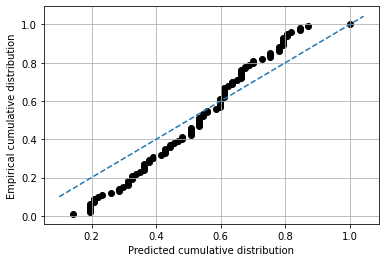

End2end test calibration error when step size is 0.001:  9.613224405464663
End2end test calibration error when step size is 0.01:  0.9635376960701635
End2end test calibration error when step size is 0.1:  0.07111654579187046


In [5]:
mean_pred, var_pred, _ = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [6]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 12.23it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 12.23it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 12.08it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.897
  RMSE          1.864
  MDAE          0.267
  MARPD         16.899
  R2            0.988
  Correlation   0.995
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.189
  Mean-absolute Calibration Error       0.168
  Miscalibration Area                   0.170
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.306
     Group Size: 0.56 -- Calibration Error: 0.207
     Group Size: 1.00 -- Calibration Error: 0.168
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.338
     Group Size: 0.56 -- Calibration Error: 0.238
     Group Size: 1.00 -- Calibration Error: 0.189
===============

Lims is None. Setting lims now:
min_max_true: (0.08, 62.42)
min_max_pred: (0.017810822, 55.725834)
lims: (0.017810822, 62.42)
lims_ext: (-6.222407913208008, 68.66021690368652)


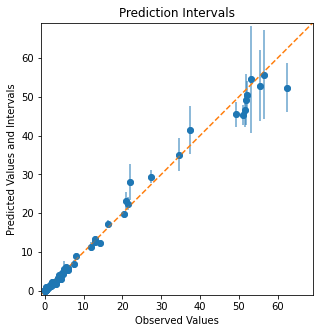

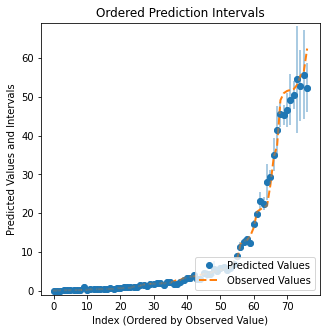

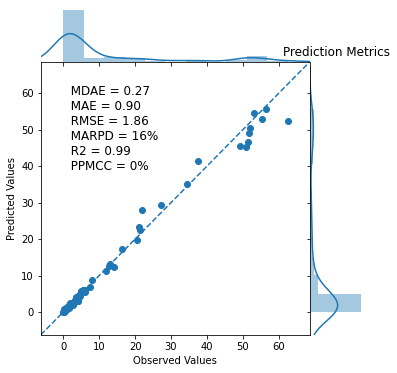

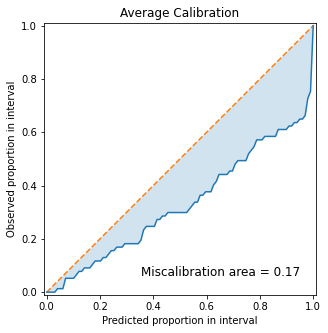

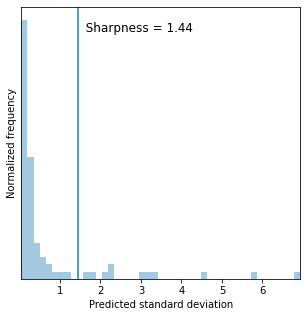

In [7]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))